Train and test datasets are taken same and hence both have anomalies.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os 
import json

/home/nirajan/miniconda3/envs/trainee/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dataset_folder = '../data/NAB'
file_list = os.listdir(dataset_folder)
file_list

['rogue_agent_key_updown.csv',
 'labels.json',
 'nyc_taxi.csv',
 'rogue_agent_key_hold.csv',
 'cpu_utilization_asg_misconfiguration.csv',
 'ambient_temperature_system_failure.csv',
 'machine_temperature_system_failure.csv',
 'ec2_request_latency_system_failure.csv',
 'README.md']

In [3]:
with open(dataset_folder + "/labels.json") as f:
    labeldict = json.load(f)

In [4]:
filename = "machine_temperature_system_failure.csv"
df = pd.read_csv(dataset_folder + '/' + filename)
display(df.head())

,timestamp,value
0,2013-12-02 21:15:00,73.967322
1,2013-12-02 21:20:00,74.935882
2,2013-12-02 21:25:00,76.124162
3,2013-12-02 21:30:00,78.140707
4,2013-12-02 21:35:00,79.329836


In [5]:
labeldict['realKnownCause/machine_temperature_system_failure.csv']

['2013-12-11 06:00:00.000000',
 '2013-12-16 17:25:00.000000',
 '2014-01-28 13:55:00.000000',
 '2014-02-08 14:30:00.000000']

In [7]:
len(df.values[:, 1])

22695

In [9]:
vals = df.values[:, 1]
labels = np.zeros_like(vals, dtype=np.float64)

for timestamp in labeldict['realKnownCause/machine_temperature_system_failure.csv']:
    tstamp = timestamp.replace('.000000', '')
    index = np.where(((df["timestamp"] == tstamp).values + 0) == 1)[0][0]
    print(timestamp, " : ", index)
    labels[index - 4 : index + 4] = 1

min_temp, max_temp = np.min(vals), np.max(vals)
vals = (vals - min_temp) / (max_temp - min_temp)


train, test = vals.astype(float), vals.astype(float)
print(train.shape, test.shape)


2013-12-11 06:00:00.000000  :  2409
2013-12-16 17:25:00.000000  :  3986
2014-01-28 13:55:00.000000  :  16340
2014-02-08 14:30:00.000000  :  19515
(22695,) (22695,)


In [12]:
train, test, labels = train.reshape(-1, 1), test.reshape(-1, 1), labels.reshape(-1, 1)

In [13]:
train.shape, test.shape, labels.shape

((22695, 1), (22695, 1), (22695, 1))

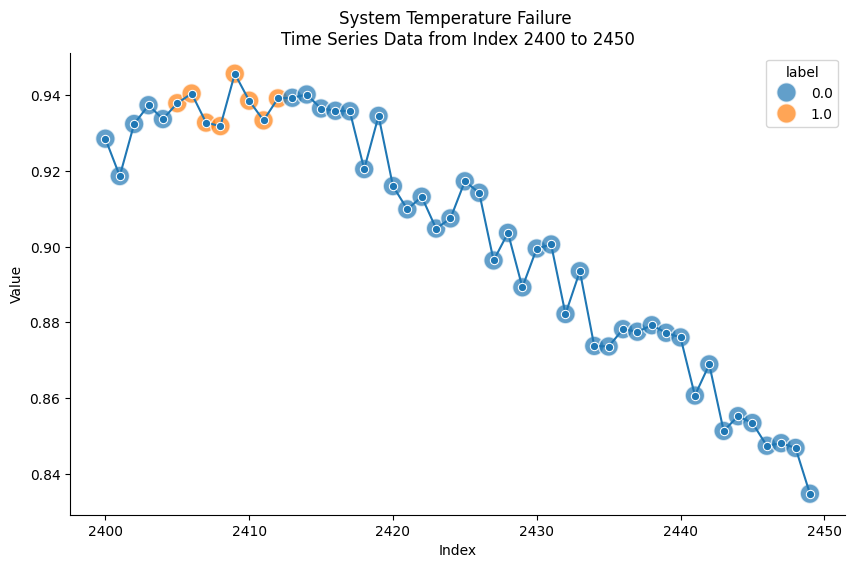

In [14]:
start_index, end_index = 2400, 2450
subset_data = train[start_index:end_index]
subset_labels = labels[start_index:end_index].flatten()

# Convert to a suitable format for seaborn
x = np.arange(start_index, end_index)
y = subset_data.flatten()

plot_df = pd.DataFrame({
    "index" : x, 
    "values" : y,
    "label" : subset_labels  
})

# Create the plot
plt.figure(figsize=(10, 6))

ax = sns.lineplot(data = plot_df, x = "index", y="values", marker='o',)
sns.scatterplot(data = plot_df, x = "index", y = "values", hue="label", s=200, alpha=0.7, ax=ax)

sns.despine()
plt.title(f'System Temperature Failure \nTime Series Data from Index {start_index} to {end_index}')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()